In [11]:
from sklearn import svm,datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
iris=datasets.load_iris()
#Iris has data in multiple classes thus used
x=iris.data[:,0:2]
#We can only deal with 2 features at once
y=iris.target

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [14]:
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
#We will be finding an optimal value of C
#SVC uses one vs one scheme
#Class_weight will be used if certain weightage is to be given to a particular class
#For further info use:http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
clf.score(x_test,y_test)

0.86842105263157898

In [17]:
#To plot the decision boundary
def makegrid(x1,x2,h=0.02):
    x1_min,x1_max=x1.min()-1,x1.max()+1
    x2_min,x2_max=x2.min()-1,x2.max()+1
    a=np.arange(x1_min,x1_max,h)
    b=np.arange(x2_min,x2_max,h)
    xx,yy=np.meshgrid(a,b)
    #Replicates a and b mulitple times i.e creates all possible points
    return xx,yy

In [18]:
x1=np.array([1,3])
x2=np.array([5,6])
makegrid(x1,x2)

(array([[ 0.  ,  0.02,  0.04, ...,  3.94,  3.96,  3.98],
        [ 0.  ,  0.02,  0.04, ...,  3.94,  3.96,  3.98],
        [ 0.  ,  0.02,  0.04, ...,  3.94,  3.96,  3.98],
        ..., 
        [ 0.  ,  0.02,  0.04, ...,  3.94,  3.96,  3.98],
        [ 0.  ,  0.02,  0.04, ...,  3.94,  3.96,  3.98],
        [ 0.  ,  0.02,  0.04, ...,  3.94,  3.96,  3.98]]),
 array([[ 4.  ,  4.  ,  4.  , ...,  4.  ,  4.  ,  4.  ],
        [ 4.02,  4.02,  4.02, ...,  4.02,  4.02,  4.02],
        [ 4.04,  4.04,  4.04, ...,  4.04,  4.04,  4.04],
        ..., 
        [ 6.94,  6.94,  6.94, ...,  6.94,  6.94,  6.94],
        [ 6.96,  6.96,  6.96, ...,  6.96,  6.96,  6.96],
        [ 6.98,  6.98,  6.98, ...,  6.98,  6.98,  6.98]]))

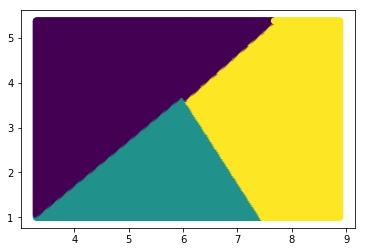

In [19]:
xx,yy=makegrid(x[:,0],x[:,1])
predictions=clf.predict(np.c_[xx.ravel(),yy.ravel()])
#Ravel converts the data to a huge 1D array
plt.scatter(xx.ravel(),yy.ravel(),c=predictions)
plt.show()